<br>
<br>
<br>
<br>

# DAV 6150 Module 3: Feature Engineering + Data Preparation
<br>
<br>
<br>

## Module 2 Assignment Review

#### General Comments

- Make sure you are meeting the Assignment / Project requirements as detailed in the Assignment / Project requirements document (e.g., required writeup sections, presentation duration limits, reading data sets from Github, providing written narratives in formatted Markdown cells, ensuring your documents are free of spelling + grammar errors, etc.)


- When using K-Fold cross validation, make sure you provide an explanation as to why you chose a specific value for K.


- The use of K-Fold cross validation does __NOT__ eliminate the need to separate our data into training and testing subsets. Cross validation is applied to the __training__ subset. The testing subset is then used to assess the performance of the model when applied to previously "unseen" data.


- Do not include graphics in your EDA that you do not provide a written explanatory narrative for. Graphics lacking explanatory narratives are of no use to a reader of your work.


- When performing exploratory data analysis for numeric data, be sure to __always__ create and analyze both a histogram and a boxplot for each numeric variable. Histograms and boxplots provide us with different insights into the distribution of a numeric variable. For example, histograms can provide us with insight into the __shape__ of a distribution, while boxplots help us locate the median and IQR boundaries. As such, both need to be examined and discussed during EDA work.

**Lets start with an example**. Retrieved from https://youtu.be/nKW8Ndu7Mjw

1. Hieght is a useful feature at the extream ends of the distribution, but at the center, we cannot easily determine which dog to predict, given probabilities are similar.
2. Feature captures difference information
3. Thought experiment -- also refered to as hypothesis - what are features can help us distinguish labs from gryhounds? e.g hair length, speed, weight...
4. What is a useless feature? one that is not going to help us distinguish -- it can hurt our models accuracy.
5. You want your features to be independent. e.g. hieght(cm) , height(inches). Remove higly correlated features - redundant features. The classifier will double count the importance of this feature.
6. Features should be easy to understand.


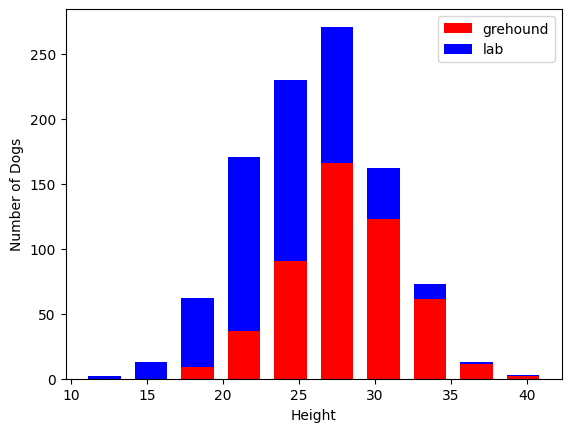

In [9]:
import numpy as np
import matplotlib.pyplot as plt

greyhound_mean = 500
lab_mean = 500

grey_height = 28 + 4*np.random.randn(greyhound_mean)
lab_height = 24 + 4*np.random.randn(lab_mean)
color = ['r', 'b']
labels = ['grehound', 'lab']
plt.hist([grey_height , lab_height], stacked = True, rwidth=0.7, color = color, label = labels)
plt.legend(prop ={'size': 10})

plt.ylabel("Number of Dogs")
plt.xlabel("Height")
plt.show()

# Data vs. Information


### What is "Data"?

In Data Science, __data__ are simply a collection of individual quantitative and/or qualitative values.

In this context, __DATA IS NOT INFORMATION__.


### What is "Information"?

By contrast, __information__ is the result of the __summarization, labeling, and analysis of data__.


### How do we create "Information"?

When we gather data for a specific data science project, there is likely to be a fair amount of information already available to us regarding the data we have collected, including:

- Why the data was originally collected


- How has the data been __categorized__, including the __units of analysis__ used.


- How was the data __calculated__ (e.g., were measurements taken? If so, how? Were other mathematical / statistical transformations applied to it? etc.)


- Has the data been __condensed / summarized__ in some way?


- Have data errors already been corrected or removed from the data?


During our EDA work, we are striving to derive __actionable information__ from the data we have at hand.


We __create new information__ by:

- Generating summary statistics


- Generating graphical representations of distributions + relationships between variables and/or between variables and specific categorical values


- Imputing missing data values


- Transforming data values via mathematical functions (e.g., scaling, standardization, normalization, etc.)


- Feature Engineering


- etc.



### Why would we want to create "Information"?

The goal of deriving "information" from data is __to create information that can drive decision making__. In other words, __our goal is to derive ACTIONABLE INFORMATION from a set of data__.

For example, __the results of our EDA work are information__ that __serve as the basis for our data preparation and model building decisions__. Without an effective EDA, __our data preparation and model building efforts are likely to prove to be ineffective__.


### Great ! So Now What ??

The topics we are learning about in Module 3 are tools / methods we can use to __improve the quality__ of our data. __If we improve the quality of our data, the quality of the information we are able to extract from our data will also improve__. And the better our information is, the more likely it is we will be able to make decisions / take actions that will prove to be effective.


## Remember:  Bad Data => Bad Information => Bad Decisions


<br>
<br>


# Feature Engineering

Prior to constructing a model, it is oftentimes beneficial to consider the addition of new attributes (or "features") to our data that you believe will either simplify or enhance the performance of our intended model. We create such "features" through the use of the __domain knowledge__ we have for the data we plan to make use of.

The addition of new attributes/features based on __domain knowledge__ is referred to as __Feature Engineering__.

What is a __"feature"__? In general, a __feature__ is a characteristic or property of the independent variables we are planning to use for purposes of analysis or model building.

In general, we can think of __feature engineering__ as creating new attributes for modeling based on both our __domain knowledge__ and the data we already have at hand.

Some examples of __feature engineering__:

- __Creation of indicator variables based on our domain knowledge__: For example, if we were working with historical data on US housing prices for the years 2000 - 2018, our domain knowledge could tell us that a major collapse in US housing prices occurred during the 2007 - 2012 timeframe due to the 2007 financial crisis, followed by a recovery that started during the year 2012. As such, if we believe that our overall housing price data content may have been tangibly impacted by the financial crisis, we could create a binary indicator variable that flags every data item within the 2007-2012 time period as potentially having been impacted by the financial crisis (assigning a '1' as the indicator), while all other data items are assigned a '0' for the indicator variable's value.


- __Create "Interaction" Features__: Interaction features are new metrics we __derive__ from our existing data.Examples include creating new ratios / proportions from our existing data as well as binning / bucketing of numeric data and the de-structuring of date / time values. Dimensionality reduction methods such as Principal Components Analysis (PCA) and Singular Value Decomposition (SVD) create new interaction features through the use of linear algebra techniques.


- __Combining Sparse Classifications__: With categorical data, "sparse classes" are those that have very few observations within a data set. Such "sparse data" can cause problems with a wide variety of predictive and machine learning models (e.g., causing the models to "overfit" the data use for model training purposes).  These challenges can oftentimes be overcome by combining sparse classes into new classifications that aggregate the sparse items based on some shared characteristic(s). How we identify such "shared characteristics" is highly subjective, i.e., we need to apply our __domain knowledge__ to identify them.


- __Adding "Dummy" Variables__: We cannot use raw categorical data as input to a model that requires numerical data. Instead, we create a new "0/1" binary indicator variable for each categorical data value.


- __Removal of Unused Attributes/Features__: Oftentimes our data sets contain attributes that are of no use whatsoever for modeling purposes, such as unique ID's, text descriptions, and any other data that may be unlikely to be available if the model were placed into a "production" environment. Such attributes should be removed from the data we plan to use as input to a model.


### How to Approach Feature Engineering?

1. Using your __domain knowledge__, brainstorm ideas for potential new features relative to the data you have at hand. If you lack sufficient domain knowledge, seek out subject matter experts and/or develop your own critical mass of knowledge via research + reading.


2. Create the features you believe will be useful (i.e., figure out how to add them to your data set).


3. Test the features within your proposed analysis/model: do they improve the performance of the model? How relevant are they to the data set, i.e., do they provide new information that isn't available in any other attribute/feature already contained in the data set? Are they duplicative/redundant relative to other features/attributes contained within the data set? etc.


4. Refine/improve your new features if needed.


5. Go back to Step 1 (above) and consider whether the addition of other features would be beneficial.

# Data Preparation: How to Correct Data Quality Problems

On average, 80% of an analytics professional's time is consumed by data preparation tasks (e.g., data cleansing, data transformation / reformatting, data rearrangement, etc.)


- Missing Data: What to do when data values are missing from your data set?


- Duplicate Data: Should it be removed?


- Adding 'Derived' Data: Add new attributes to a data set based on calculations or other analyses that are applied to some subset of the original set of attributes.


- Discretization/Binning: Simplification of continuous numerical data for analytical purposes.


- Outliers: How to detect and filter them?


- Creating Dummy Variables: Convert a categorical variable into a set of "dummy" vectors to enable statistical modeling or machine learning.

## Missing Data

- What has caused a data value to be missing? Was it a data collection problem? A data entry problem? Other reason?


- What biases might missing values be introducing to the data set? e.g., skewing of mean, median, and mode values; skewing of the distribution of an attribute's values; etc.


- Simple solution: Remove use cases containing missing values. However, what if the rest of the use case contains valid data? What impact does discarding that valid data have on a data set?


- Simple solution # 2: Remove attributes containing missing values. But this solution can also lead to the removal of otherwise valid data from the data set.


- Better (but often still problematic) solution: Fill the missing values with a valid value derived from the actual valid values of the attribute (e.g., mean, mode, median). However, use of the mean, median, or mode to backfill missing values can alter the probability density function (PDF) of the affected attribute. If the PDF changes, what impact does that have on the rest of your otherwise valid data?


- Even better solution: Fill the missing values using an approach that __does not__ change the PDF of the affected attribute. Examples include using a linear model or regression model to calculate an appropriate value based on the valid values that populate the rest of the associated use cases.


Questions from "Feature Engineering and Selection", Chapter 8, Handling Missing Data (18 pages).

Code: https://github.com/topepo/FES
HTML book: https://bookdown.org/max/FES/


1. When is it appropriate to simply delete observations containing missing data?
2. What types of approaches/algorithms are appropriate for imputing missing numeric data? How about for imputing missing categorical data?
3. When is it acceptable to fill a missing data value with the mean of the corresponding attribute?
4. In what instances should indicator variables be introduced to a data set to flag missing data values?

Imputing missing data using KNN. https://www.geeksforgeeks.org/python-imputation-using-the-knnimputer/

FES Figure 8.7 Example of KNN techniques: https://bookdown.org/max/FES/imputation-methods.html

Also see this for example of imputation using random and linear regression method: https://www.kaggle.com/code/shashankasubrahmanya/missing-data-imputation-using-regression

In [32]:

import numpy as np
import pandas as pd

# import the KNNimputer class
from sklearn.impute import KNNImputer

# create dataset for marks of a student
dict = {'Maths':[80, 90, np.nan, 95],
        'Chemistry': [60, 65, 56, np.nan],
        'Physics':[np.nan, 57, 80, 78],
       'Biology' : [78,83,67,np.nan]}

# creating a data frame from the list
Before_imputation = pd.DataFrame(dict)
#print dataset before imputation
print("Data Before performing imputation\n",Before_imputation)

# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=2)
After_imputation = imputer.fit_transform(Before_imputation)
# print dataset after performing the operation
print("\n\nAfter performing imputation\n",After_imputation)

Data Before performing imputation
    Maths  Chemistry  Physics  Biology
0   80.0       60.0      NaN     78.0
1   90.0       65.0     57.0     83.0
2    NaN       56.0     80.0     67.0
3   95.0        NaN     78.0      NaN


After performing imputation
 [[80.  60.  68.5 78. ]
 [90.  65.  57.  83. ]
 [87.5 56.  80.  67. ]
 [95.  58.  78.  72.5]]


MLPR, Ch. 4, Missing Data and Code Along: https://github.com/mattharrison/ml_pocket_reference/blob/master/ch04.ipynb

## Duplicate Data

- What has caused a data to be duplicated? Was it a data collection problem? A data entry problem? Other reason? Is it actually __valid__ data?


- Simple solution: Remove duplicative use cases. What impact does discarding duplicate data have on a data set?

## Discretization & Binning

See code in: https://pbpython.com/pandas-qcut-cut.html


- Separating data into "bins" or ranges of values is often necessary for analysis purposes.


- How you select your "bin" sizes / ranges can significantly impact the results of your analysis. Bins that are too wide can hide pertinent details. Bins that are too narrow can potentially introduce unnecessary "noise".


- Ideally, bin widths should be equal in size


- Simplistic rule of thumb: __binwidth__ = (max(values) - min(values)) / sqrt(n) where n = number of data values


- Simplistic rule of thumb: __number of bins__ = sqrt(n) where n = number of data values


- In general, use fewer bins for small amounts of data; use more bins for large amounts of data.


## Outliers

- Outliers can be detected / identified through the use of boolean tests


- Check for values that fall far outside the range of the standard deviation for the variable, e.g., we know that 95% of all values will fall within 2 standard deviations of the mean for any variable, so values that fall more than 2.5 or 3 standard deviations from the mean might legitimately be considered as potential outliers.


- The multiplier of the standard deviation value to use for outlier detection (i.e., 2x the standard devation? 2.5x? 3x? 5x? 8x? 10x?) will typically be dependent on the nature of the data you are working with: what appears to be an outlier at 2x the standard deviation in one data set might not be in a different data set, so always be sure to __use domain knowledge + empirical testing to find the boundary that works best__. For example, if we use 2x the standard deviation as the boundary, we are implicitly stating that we believe 5% of our data values for the selected column will be outliers, whereas using 3x the standard deviation will identify only approx. 0.3% of the data values for the given variable as outliers.


- For zero bound data (i.e., attributes that we know for a fact cannot have a negative value), check for values < 0


Once you've identified your outliers, decide what to do with them: leave them alone? Remove them? Replace with another non-outlier value? You need to decide on the appropriate action based on your __domain knowledge__. Remember: __*outliers are not always invalid*__, but they can have a noticeable effect on your analysis. __There is no single "rule" that applies to how outliers should be dealt with__.

## Creating Dummy Variables

- It is not possible to perform numerical statistical analysis using categorical values: categorical variables are not considered to be "numeric" for statistical purposes, even if they are nominally comprised of digits.


- A categorical variable can assume 2 or more (oftentimes many more) values that each have a discernable non-numeric meaning that is distinct from that of any other categorical value that pertains to that same variable.


- To enable statistical analysis of a categorical variable, we must convert the values of the variable into a set of "dummy" vectors whose values are either True (the categorical value is present in the use case) or False (the categorical value is not present in the use case). One dummy variable is needed for each nominal categorical attribute value.

## Improving data quality through normalization, standardization, transforms & scaling

The use of numeric explanatory variables within any machine learning algorithm can prove to be problematic for a variety of reasons. For example:

- The numeric explanatory variables within a data set may have vastly different scales / ranges from one another


- Outliers can significantly skew the distribution of a numeric variable


- Even without outliers, numeric variables may have a skewed distribution


- Numeric data might be more heterogeneous than is necessary for the derivation of a high-performing predictive model


- Some machine learning algorithms achieve better performance results when all numeric explanatory variables have been __standardized__, i.e., each explanatory variable has been numerically transformed to ensure that its mean value is zero.


Many of these problems can be addressed through the use of numeric transforms.

__Box-Cox Transforms__ ( https://www.statisticshowto.datasciencecentral.com/box-cox-transformation/) can be applied to many non-normally distributed numeric variables for purposes of transforming such distributions into dispersements that are more Gaussian in nature. The Box-Cox approach seeks to identify an appropriate exponent (Lambda) to use to transform the distribution of a numeric variable into a more Gaussian distribution. The Lambda value indicates the power to which all data values for a given variable should be raised. However, Box-Cox generally requires that all data values within the variable be __positive__. This limitation can be overcome by simply adding a fixed constant to every value within the variable to ensure that each is greater than zero (e.g., if the variable contains negative values, find the minimum value of the variable, then add its inverse + 1 to __all__ values within the variable (e.g., if the minimum value is -67.12, add (67.12 + 1) to __all__ data values within the variable, thereby ensuring that all values have been scaled by an equivalent amount).

Some of the most commonly used Box-Cox transforms are listed in the table shown in the link above. Note that the content of the table provides us with a very clear indication of the transformation formula to be used relative to a given exponent value (Lambda).

In Python, we can implement Box-Cox transforms via the __sklearn.preprocessing.power_transform()__ function (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html ). This function will automatically test the full range of potential exponent values to identify the transform that minimizes the standard deviation of the data.

### Other types of scaling methods can also be used to address data quality issues

These include normalization, standardization, one-to-many transforms and smoothing splines.

#### Normalization vs. Standardization: What's the difference?

- __Normalization__: We use normalization when we know that the distribution of our data does not approximate a Gaussian distribution. A common normalization formula is: $Xnormalized = (X - min(X)) / (max(X) - min(X))$.   Use of this formula will transform all data values to fall within the range of $(0 <= Xnormalized <= 1)$. This formula is also referred to as a "__Min-Max Scaler__".


- __Standardization__: We use standardization when we know that the distributions of our variables are relatively Guassian but adhere to very different scales. A common standardization method makes use of the formula for calculating Z scores: $x' = (x - mean(X)) / standdev(X)$ where $X$ represents the variable being standardized and $x$ represents a single data value within that variable. Transforming all data values within a given variable using this approach will result in a transformed variable having a mean of zero and a standard deviation of 1.  Note that __this is not the same as normalization__: standardization does __NOT__ result in all data values falling with a range of $(0 <= X <= 1)$.


__ONE BIG CAVEAT__: Use of these techniques makes our models much less "interpretable" to others. For example, how do we interpret the output of a model wherein one numeric input was transformed using a cubing function while another variable was transformed using an inverse square function?


__ANOTHER BIG CAVEAT__: None of these techniques are guaranteed to improve the performance of machine learning models; sometimes they do, and sometimes they don't. However, some machine learning algorithms require that all explanatory variables be normalized. Data science practioners must therefore rely on empiricism + any guidelines recommended by the developers of any pre-built machine learning algorithms that might want to employ.


__The BOTTOM LINE__: If the application of one of these techniques does not improve the performance of your model relative to its performance when applied to the "native" form of your data, __CONTINUE USING THE DATA IN ITS "NATIVE" FORMAT"__. Applying any type of data transformation necessarily increases the complexity of your solution, so if a transformation is adding little to no value to a model, discard the transform.

## Remember: After altering your data, be sure to re-run your EDA

-  Alterations you make to your original data set for putposes of addressing data quality issues are __VERY__ likely to have a tangible impact on the metrics + summarial information resulting from your EDA work.


- Therefore it is imperative that you __re-run your EDA__ after __each cycle__ of data preparation work. Compare the results of your original EDA against those of your "post-modification" EDA to determine whether the modifications you have made have achieved their desired results. If not, why not??? Are modifications of your data preparation efforts required? If so, implement your modified data preparation methods and re-run your EDA. Continue this iterative process until you are satisfied with the results.


When re-running your EDA, be sure to check for the following:

- Have the distributions of any of the variables changed?


- Have the relationships between any of the variables changed (e.g., correlation metrics, etc.)


- Have any of your preliminary inferences regarding which variables might be more "predictive" of a response variable changed?


- etc.


#### Note that it is up to you as a data science practitioner to determine whether your data is "acceptable" for further downstream use. "Acceptable" is obviously a highly subjective term so you must use your own judgment.


Once your data is in a form that you feel is appropriate for your intended use, __be sure to rely upon the results of your last iteration of EDA to inform all of your subsequent work__.

## Imbalanced Classes in a Response Variable

### What is an "Imbalanced Classification"

An "__imbalance__" occurs within a categorical attribute when one or more of the possible classifications appear within a data set more frequently than do other possible classifications. For example, if we have a categorical attribute with three possible value and the distribution of those classifications within the attribute are such that Class1 appears within 50% of the observations, Class2 appears within 37% of the observations, and Class3 appears within the remaining 13% of observations, we have an "__imbalanced classification__" since the Class1 data value dominates the distribution of the attribute.

### Why are imbalanced classifications potentially problematic

If a single data value dominates a categorical attribute, our ability to formulate a valid / effective predictive model using the attribute will be impeded since the dominant categorical value may tend to introduce bias within our model.

#### How can we handle imbalanced classes?

__Synthetic Minority Oversampling Technique__ ("SMOTE"): The concept of SMOTE is explained in the Module 3 Assigned readings (see __Machine Learning Pocket References, Chapter 9__). SMOTE works by __synthesizing__ new examples from the minority class. The process works as follows:


- A random example from the minority class is chosen.


- k of the nearest neighbors for that example are found (typically k=5).


- An additional randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.


This process is repeated as many times as needed to balance out the classifications for the imbalanced variable

The approach is effective because new synthetic examples from the minority class are created that are __plausible__, meaning their features are relatively close to those of existing examples from the minority class.

When finished, we then have a balanced class. So if our variable is a binary categorical feature, the __null error rate__ for the data that includes the synthesized observations will be __.50__. With a .50 null error rate, an accuracy metric can be a very effective tool for comparing models.

For more details + examples see this link: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

#### So should we always use SMOTE if we have an imbalanced response variable?

Not necessarily. It can be effective in some instances but is not guaranteed to improve model performance. As always, we need to test it empirically to judge its efficacy relative to a specific data set.

#### Use a different metric
Use a metric other than accuracy. Precision and Recall can be used instead.


## Case Study: Detecting Outliers in hflights' 'Departure Delay' attribute

In [ ]:
import pandas as pd
import numpy as np

# import seaborn for graphics
import seaborn as sns

filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv"
hf = pd.read_csv(filename)
hf.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


In [ ]:
# get summary statistics for the DepDelay variable
hf.DepDelay.describe()

count    19785.000000
mean         8.297700
std         23.934218
min        -18.000000
25%         -3.000000
50%          1.000000
75%         10.000000
max        780.000000
Name: DepDelay, dtype: float64

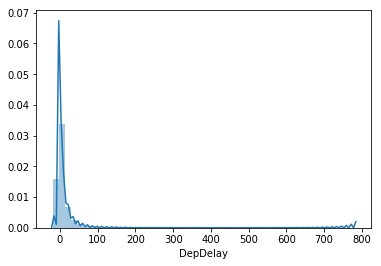

In [ ]:
# create a graphic showing the distribution of the non-null DepDelay
# values
sns.distplot(hf[hf["DepDelay"].notnull()].DepDelay);

Note the severe right skew of the distribution for the DepDelay variable: there seems to be obvious evidence of outlier values, and those outliers are likely to be having a tangible impact on both the distribution AND the summary statistics for the variable (e.g., the mean value).

In [ ]:
# find all hflight rows that have DepDelay values whose values are >
# 2.5 standard deviations from the mean of data in that column
depdel_outliers = hf[np.abs(hf['DepDelay'] - hf['DepDelay'].mean() ) > (2.5 * hf['DepDelay'].std() )]
depdel_outliers.shape

(529, 21)

The results show that we've found 529 outlier values for DepDelay out of the 20,000 rows we have in the data set. 529/20,000 = 2.645% of the total rows have DepDelay values that fall more than 2.5 standard deviations away from the mean.

What if we want to focus on the most extreme outliers for DepDelay? We could try restricting our search to only those DepDelay values that fall more than 5 standard deviations away from the mean:

In [ ]:
# find all hflight rows that have DepDelay values whose values are >
# 5 standard deviations from the mean of data in that column
depdel_outliers = hf[np.abs(hf['DepDelay'] - hf['DepDelay'].mean() ) > (5 * hf['DepDelay'].std() )]
depdel_outliers.shape

(143, 21)

Even at 5x the standard deviation, we still find 143 outliers. Let's take a look at them:

In [ ]:
# we find that the 143 flights falling more than 5 standard deviations from
# mean DepDeplay value have an average departure delay of more than 3 hours
depdel_outliers.DepDelay.describe()

count    143.000000
mean     180.181818
std       74.350203
min      128.000000
25%      140.000000
50%      161.000000
75%      193.500000
max      780.000000
Name: DepDelay, dtype: float64

We find that the 143 flights falling more than 5 standard deviations from the
mean DepDeplay value have an average departure delay of more than 3 hours and a median departure delay of 161 minutes.

In [ ]:
# check the first 10 rows
depdel_outliers.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
309,2011,1,3,1,1801.0,2200.0,B6,622,N206JB,179.0,...,111.0,136.0,HOU,JFK,1428,5.0,9.0,0,NaN,0
936,2011,1,28,5,1516.0,1916.0,CO,1,N77066,480.0,...,326.0,351.0,IAH,HNL,3904,7.0,10.0,0,NaN,0
1029,2011,1,28,5,2100.0,2301.0,CO,670,N39418,241.0,...,102.0,129.0,IAH,SFO,1635,8.0,13.0,0,NaN,0
1148,2011,1,27,4,2017.0,2135.0,CO,59,N75858,138.0,...,143.0,162.0,IAH,DEN,862,6.0,14.0,0,NaN,0
1154,2011,1,27,4,1822.0,1945.0,CO,137,N77295,203.0,...,210.0,234.0,IAH,LAX,1379,9.0,14.0,0,NaN,0
1156,2011,1,27,4,2137.0,2254.0,CO,150,N73278,197.0,...,219.0,242.0,IAH,ONT,1334,5.0,13.0,0,NaN,0
1163,2011,1,27,4,11.0,216.0,CO,209,N17730,245.0,...,137.0,168.0,IAH,PDX,1825,3.0,8.0,0,NaN,0
1171,2011,1,27,4,2237.0,153.0,CO,250,N39726,136.0,...,208.0,227.0,IAH,RDU,1043,11.0,12.0,0,NaN,0
1261,2011,1,27,4,1527.0,2202.0,CO,810,N78009,335.0,...,267.0,137.0,IAH,EWR,1400,140.0,19.0,0,NaN,0
1275,2011,1,27,4,2133.0,2216.0,CO,1411,N37274,43.0,...,134.0,148.0,IAH,AUS,140,5.0,12.0,0,NaN,0


What happens to the summary statistics for the DepDelay variable if we remove these 143 extreme outliers?

In [ ]:
# create a temporary series for the DepDelay variable
DepDelay_temp = hf.DepDelay
DepDelay_temp.shape

(20000,)

In [ ]:
# now remove the extreme outliers from the temporary series
DD2 = DepDelay_temp.drop(depdel_outliers.index.values)
DD2.shape

(19857,)

In [ ]:
# get summary statistics after the extreme outliers have been removed
DD2.describe()

count    19642.000000
mean         7.046329
std         17.899270
min        -18.000000
25%         -3.000000
50%          1.000000
75%         10.000000
max        127.000000
Name: DepDelay, dtype: float64

Note how the mean decreased from 8.2977 to 7.046 while the standard deviation decreased from 23.934218 to 17.899: these are significant changes, i.e.,  the __mean__ value has __decreased__ by __more than 15%__ while the __standard deviation__ value has __decreased__ by __more than 25%__.

Let's look at how the removal of the extreme outliers effected the distribution of the variable:

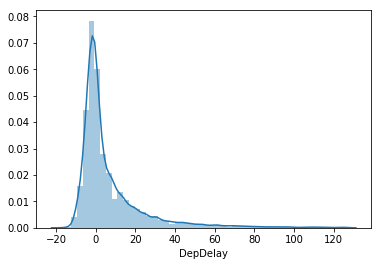

In [ ]:
# create a graphic showing the distribution of the non-null DepDelay
# values
sns.distplot(DD2[DD2.notnull()]);

Let's make a facet plot showing how these DepDelay outliers are distributed by UniqueCarrier and Origin:

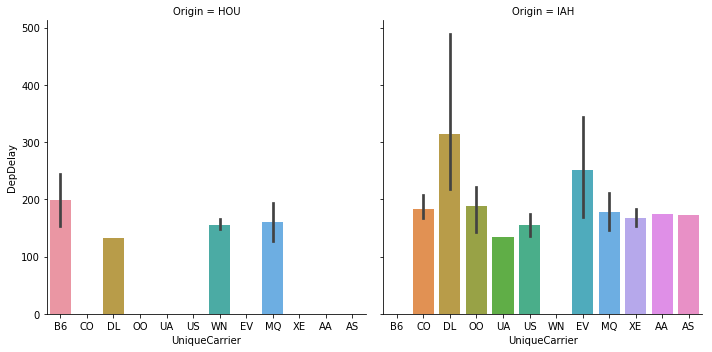

In [ ]:
# facet grid for UniqueCarrier vs. DepDelay outliers by point of origin
# NOTE: the 'factorplot()' function has been renamed to "catplot()"

sns.catplot(x='UniqueCarrier', y='DepDelay', col='Origin',
               kind='bar', data= depdel_outliers);

We see that airlines flying out of IAH appear to experience longer average extreme departure delays than do airlines flying out of HOU. What might be the reason for this?

We also see that Delta ('DL') seems to experience the highest average severe departure delays of the airlines flying out of IAH. Let's see if we can identify the destinations most impacted by such delays:

In [ ]:
# display a list of extreme departure delays for Delta w origin = IAH
depdel_outliers[(depdel_outliers.UniqueCarrier == 'DL') & (depdel_outliers.Origin == 'IAH')]

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
6507,2011,1,12,3,1038.0,1340.0,DL,1900,N934DL,122.0,...,210.0,218.0,IAH,ATL,689,21.0,13.0,0,NaN,0
6529,2011,1,15,6,941.0,1230.0,DL,1248,N366NB,109.0,...,223.0,236.0,IAH,ATL,689,8.0,15.0,0,NaN,0
6532,2011,1,15,6,1737.0,2035.0,DL,1590,N762NC,118.0,...,487.0,488.0,IAH,ATL,689,6.0,18.0,0,NaN,0


From the table above we can see there were three extreme departure delays for Delta having an origin of IAH, all of them having a destination of 'ATL', and two of them occurred on the same day (1/15/2011).

Let's create a facet plot showing how these extreme departure delays are distributed by the day of the week for each point of origin:

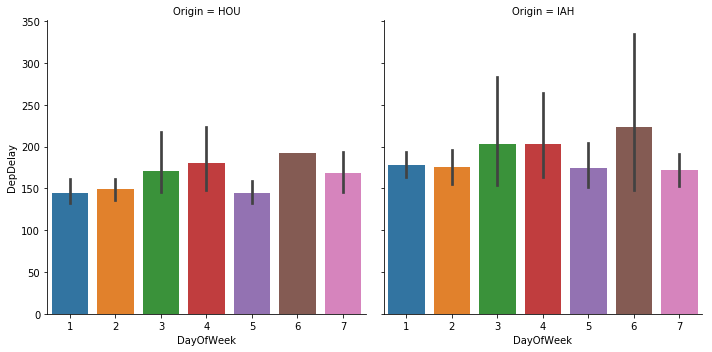

In [ ]:
# facet grid for Dest vs. DepDelay outliers by point of origin
# NOTE: the 'factorplot()' function has been renamed to "catplot()"

sns.catplot(x='DayOfWeek', y='DepDelay', col='Origin',
               kind='bar', data= depdel_outliers);

# **Group exercise:**

Elite Data Science: https://elitedatascience.com/feature-engineering

1. What's the difference between an indicator variable and a dummy variable?
2. In what instances, should each be used?
3. What are interaction features and how can they be used?
4. How might the combining of sparse classes be an effective method of improving the quality of a data set?
5. How might the removal of certain attributes also accomplish this?

[Text(0, 0, '15'),
 Text(0, 0, '27'),
 Text(0, 0, '12'),
 Text(0, 0, '25'),
 Text(0, 0, '35')]

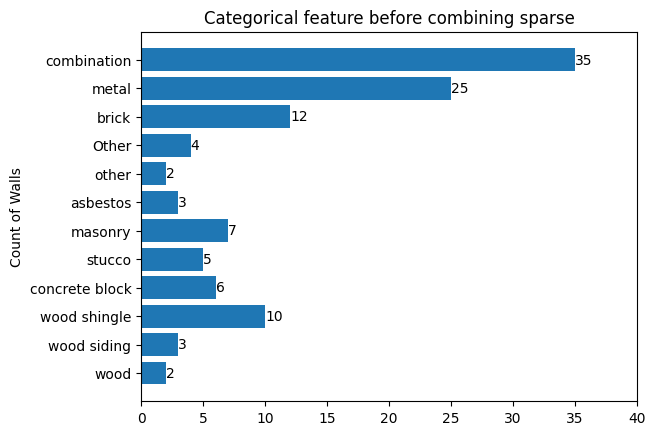

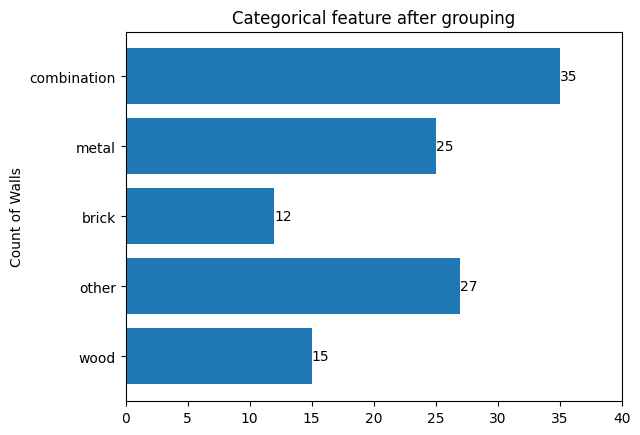

In [30]:
import numpy as np
import pandas as pd

wall_names = ["wood", "wood siding", "wood shingle", "concrete block",
       'stucco', 'masonry', 'asbestos', 'other',
       'Other','brick', 'metal', 'combination']
wall_counts = [2,3,10,6,5,7,3,2,4,12,25,35]

fig, ax = plt.subplots()
bar_container = ax.barh(wall_names, wall_counts)
ax.set(ylabel='Count of Walls', title='Categorical feature before combining sparse', xlim=(0, 40))
ax.bar_label(bar_container, fmt='{:,.0f}')

wall_names = ["wood",'other','brick', 'metal', 'combination']
wall_counts = [15, 27, 12, 25, 35]

fig, ax = plt.subplots()
bar_container = ax.barh(wall_names, wall_counts)
ax.set(ylabel='Count of Walls', title='Categorical feature after grouping', xlim=(0, 40))
ax.bar_label(bar_container, fmt='{:,.0f}')



1. Most machine learning algorithms cannot directly handle categorical features. Specifically, they cannot handle text values. Therefore, we need to create dummy variables for our categorical features.

2. Unused features are those that don’t make sense to pass into our machine learning algorithms. Examples include:
ID columns
Features that wouldn’t be available at the time of prediction
Other text descriptions

# Assigned Reading

- Read FES, Ch. 5, Encoding Categorical Predictors (27 pages) and Ch. 6, Engineering Numeric Predictors (pp. 121-134)

- Read MLPR, Ch. 7, Preprocess Data and Code Along
As you read, be sure to run the associated MLPR chapter 7 python code Links to an external site. for hands-on preprocessing practice. https://github.com/mattharrison/ml_pocket_reference/blob/master/ch07.ipynb

- Read MLPR, Ch. 9 and Code Along imbalanced class https://github.com/mattharrison/ml_pocket_reference/blob/master/ch09.ipynb

# Module 3 Assignment Guidelines / Requirements

[See Assignment](https://yu.instructure.com/courses/63488/assignments/324296?module_item_id=1157241)

**You may work in small groups of no more than three (3) people for this Assignment**

If you decide to work in groups, clearly divide your work such that each coded section is referenced by the person who contributed to the code.


In [45]:

import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/SamarDeen/Yeshiva/main/M3_Data.csv',
               usecols = ['TARGET',	'FixedAcidity',	'VolatileAcidity',	'CitricAcid',	'ResidualSugar',	'Chlorides',	'FreeSulfurDioxide',
                           'TotalSulfurDioxide',	'Density',  'pH',	'Sulphates',	'Alcohol',	'LabelAppeal',	'AcidIndex',	'STARS'])
df.head(2)


,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.16,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,3,4.5,0.16,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
